#  Apple Stock Dataset

In this notebook, we use two different models to predict the price of Apple Stock, including the Linear Regression and the Random Forest.

We will use basic functionalities of the machine learning library `scikit-learn`. 
Install this by
```
$pip install scikit-learn
```

Documentation is found [here](https://scikit-learn.org/stable/).

We also need `pandas`, `numpy` and plotting libraries `matplotlib` and `seaborn`.
```
$pip install numpy pandas matplotlib seaborn
```

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# EDA - Exploratory Data Analysis

This dataset is given by `aapl_data.csv`. 

Feature Description in `.csv`:

    date - date of open market
  
    open - price when market opens
  
    high - highest price during open period
  
    low - lowest price during open period
  
    close - price when market is closed

    volume - number of shares traded

## Import Data

In [2]:
# Import data
raw_dataset = pd.read_csv('aapl_data.csv')

In [3]:
raw_dataset.shape

(2517, 6)

In [4]:
raw_dataset.head()

,date,open,high,low,close,volume
0,3/1/2013,15.643,15.649,15.356,15.374,552447168
1,3/4/2013,15.279,15.293,14.964,15.002,582737596
2,3/5/2013,15.053,15.543,15.027,15.398,638428168
3,3/6/2013,15.518,15.545,15.158,15.202,460249076
4,3/7/2013,15.161,15.429,15.038,15.378,468471304


## Preprocess Data

First of all, check null and na value

In [5]:
# Check null value
raw_dataset.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64

In [6]:
# Check na value
raw_dataset.isna().any()

date      False
open      False
high      False
low       False
close     False
volume    False
dtype: bool

In [7]:
# Check duplicated value
raw_dataset.duplicated().sum()

0

Next, lets sort dataset by date format.

This is already the case in our data (in chronological order). Therefore, we do not have to do this additional data preparation step.

In [8]:
#Sorting dataset by date format
#df = raw_dataset.sort_values(by='date')

In [9]:
df = raw_dataset.copy()
df.head()

,date,open,high,low,close,volume
0,3/1/2013,15.643,15.649,15.356,15.374,552447168
1,3/4/2013,15.279,15.293,14.964,15.002,582737596
2,3/5/2013,15.053,15.543,15.027,15.398,638428168
3,3/6/2013,15.518,15.545,15.158,15.202,460249076
4,3/7/2013,15.161,15.429,15.038,15.378,468471304


## Data Visualizations

Since this is a TimeSeries problem, we have to parse `date` column.

In [10]:
from datetime import datetime, date 

df['date'] = pd.to_datetime(df['date'], format = '%m/%d/%Y')
df.head().style.set_properties(subset=['date'], **{'background-color': 'dodgerblue'})


,date,open,high,low,close,volume
0,2013-03-01 00:00:00,15.643000,15.649000,15.356000,15.374000,552447168
1,2013-03-04 00:00:00,15.279000,15.293000,14.964000,15.002000,582737596
2,2013-03-05 00:00:00,15.053000,15.543000,15.027000,15.398000,638428168
3,2013-03-06 00:00:00,15.518000,15.545000,15.158000,15.202000,460249076
4,2013-03-07 00:00:00,15.161000,15.429000,15.038000,15.378000,468471304


In [11]:
# Get the duration of dataset
print("Starting date: ", df.iloc[0][0])
print("Ending date: ", df.iloc[-1][0])
print("Duration: ", df.iloc[-1][0] - df.iloc[0][0])


Starting date:  2013-03-01 00:00:00
Ending date:  2023-02-28 00:00:00
Duration:  3651 days 00:00:00


We will visualize the data to find some patterns. 

The `seaborn` plotting library has some useful tools to do this.

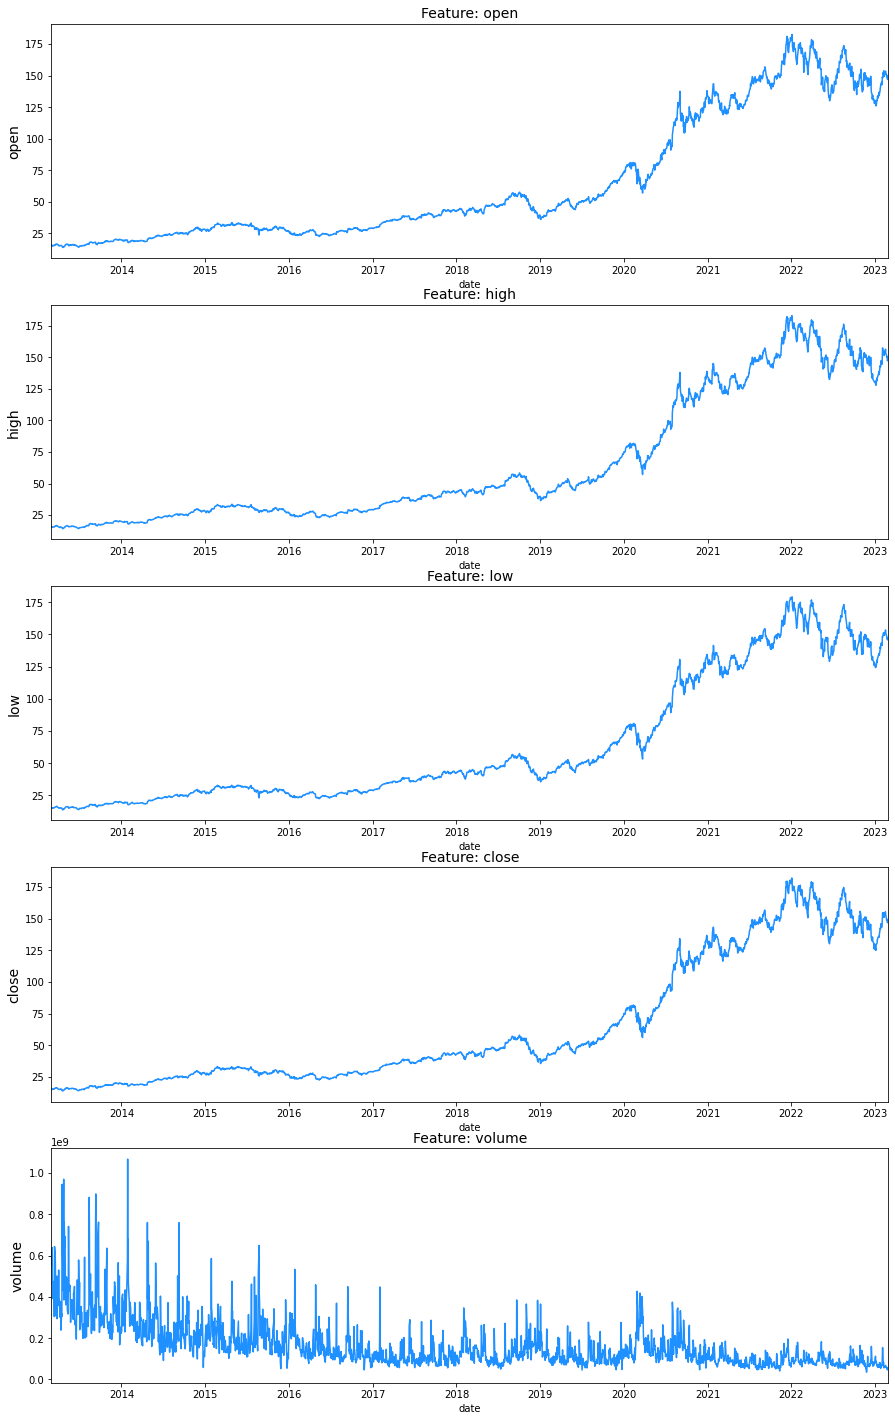

In [12]:
f, ax = plt.subplots(nrows=5, ncols=1, figsize=(15, 25))

for i, column in enumerate(df.drop('date', axis=1).columns):
    sns.lineplot(x=df['date'], 
                 y=df[column], 
                 ax=ax[i], 
                 color='dodgerblue')
    ax[i].set_title('Feature: {}'.format(column), fontsize=14)
    ax[i].set_ylabel(ylabel=column, fontsize=14)
                      
    ax[i].set_xlim([date(2013, 3, 1), date(2023, 2, 28)])                

As we can see above, the behavior of Apple Stock increases drastically in 2020 - 2021. Possible cause is due to the Coronavirus.

# Feature Engineering

In [13]:
data = raw_dataset.copy()

# parse 'date'
data['date'] = pd.to_datetime(data['date'])

In [14]:
# Creat features
lags = [1,2,3,4,5,6,7,8,9,10]
feats = ['open','close','high','low','volume']

all_feats = ['open','close','high','low','volume']

for lag in lags:
    for feat in feats:
        data[feat+'_lag'+str(lag)] = data[feat].shift(lag).bfill()
        all_feats.append(feat+'_lag'+str(lag))


In [15]:
data.shape

(2517, 56)

In [16]:
data.head()

,date,open,high,low,close,volume,open_lag1,close_lag1,high_lag1,low_lag1,...,open_lag9,close_lag9,high_lag9,low_lag9,volume_lag9,open_lag10,close_lag10,high_lag10,low_lag10,volume_lag10
0,2013-03-01,15.643,15.649,15.356,15.374,552447168,15.643,15.374,15.649,15.356,...,15.643,15.374,15.649,15.356,552447168.0,15.643,15.374,15.649,15.356,552447168.0
1,2013-03-04,15.279,15.293,14.964,15.002,582737596,15.643,15.374,15.649,15.356,...,15.643,15.374,15.649,15.356,552447168.0,15.643,15.374,15.649,15.356,552447168.0
2,2013-03-05,15.053,15.543,15.027,15.398,638428168,15.279,15.002,15.293,14.964,...,15.643,15.374,15.649,15.356,552447168.0,15.643,15.374,15.649,15.356,552447168.0
3,2013-03-06,15.518,15.545,15.158,15.202,460249076,15.053,15.398,15.543,15.027,...,15.643,15.374,15.649,15.356,552447168.0,15.643,15.374,15.649,15.356,552447168.0
4,2013-03-07,15.161,15.429,15.038,15.378,468471304,15.518,15.202,15.545,15.158,...,15.643,15.374,15.649,15.356,552447168.0,15.643,15.374,15.649,15.356,552447168.0


In [17]:
# Moving window
lag = 1
for window in [2, 4, 6, 8, 10]:
    data[f'app_rollmea{window}_{lag}'] = data[feat+'_lag'+str(lag)].transform(lambda s: s.rolling(window, min_periods=1).sum())        
    all_feats.append(f'app_rollmea{window}_{lag}')
    
for price in ['open','close','high','low']:
    data[price+'_target'] = data[price].shift(-1)
    
data['day_count'] = data.index.values.astype(int)

all_feats.append('day_count')

data.head()

,date,open,high,low,close,volume,open_lag1,close_lag1,high_lag1,low_lag1,...,app_rollmea2_1,app_rollmea4_1,app_rollmea6_1,app_rollmea8_1,app_rollmea10_1,open_target,close_target,high_target,low_target,day_count
0,2013-03-01,15.643,15.649,15.356,15.374,552447168,15.643,15.374,15.649,15.356,...,5.524472e+08,5.524472e+08,5.524472e+08,5.524472e+08,5.524472e+08,15.279,15.002,15.293,14.964,0
1,2013-03-04,15.279,15.293,14.964,15.002,582737596,15.643,15.374,15.649,15.356,...,1.104894e+09,1.104894e+09,1.104894e+09,1.104894e+09,1.104894e+09,15.053,15.398,15.543,15.027,1
2,2013-03-05,15.053,15.543,15.027,15.398,638428168,15.279,15.002,15.293,14.964,...,1.135185e+09,1.687632e+09,1.687632e+09,1.687632e+09,1.687632e+09,15.518,15.202,15.545,15.158,2
3,2013-03-06,15.518,15.545,15.158,15.202,460249076,15.053,15.398,15.543,15.027,...,1.221166e+09,2.326060e+09,2.326060e+09,2.326060e+09,2.326060e+09,15.161,15.378,15.429,15.038,3
4,2013-03-07,15.161,15.429,15.038,15.378,468471304,15.518,15.202,15.545,15.158,...,1.098677e+09,2.233862e+09,2.786309e+09,2.786309e+09,2.786309e+09,15.350,15.419,15.551,15.308,4


In [18]:
print(all_feats)

['open', 'close', 'high', 'low', 'volume', 'open_lag1', 'close_lag1', 'high_lag1', 'low_lag1', 'volume_lag1', 'open_lag2', 'close_lag2', 'high_lag2', 'low_lag2', 'volume_lag2', 'open_lag3', 'close_lag3', 'high_lag3', 'low_lag3', 'volume_lag3', 'open_lag4', 'close_lag4', 'high_lag4', 'low_lag4', 'volume_lag4', 'open_lag5', 'close_lag5', 'high_lag5', 'low_lag5', 'volume_lag5', 'open_lag6', 'close_lag6', 'high_lag6', 'low_lag6', 'volume_lag6', 'open_lag7', 'close_lag7', 'high_lag7', 'low_lag7', 'volume_lag7', 'open_lag8', 'close_lag8', 'high_lag8', 'low_lag8', 'volume_lag8', 'open_lag9', 'close_lag9', 'high_lag9', 'low_lag9', 'volume_lag9', 'open_lag10', 'close_lag10', 'high_lag10', 'low_lag10', 'volume_lag10', 'app_rollmea2_1', 'app_rollmea4_1', 'app_rollmea6_1', 'app_rollmea8_1', 'app_rollmea10_1', 'day_count']


# Modeling

We will use Linear Regression and Random Forest to predict the price. 

First, define error functions.

In [19]:
# Define 1day_error, 3day_avg_error and 3day_exp_error

def one_day_error(y_true, y_pred):
    return np.abs(y_true - y_pred)/y_true

def three_day_avg_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred)/y_true)

def three_day_exp_error(y_true, y_pred):
    return (one_day_error(y_pred[0],y_true[0]) + 2*one_day_error(y_pred[1],y_true[1]) + 3*one_day_error(y_pred[2],y_true[2]))/6
    
def evaluate_result(y_true,y_pred):
    ans = {}
    ans['1st d err'] = one_day_error(y_true[0],y_pred[0])
    ans['2nd d err'] = one_day_error(y_true[1],y_pred[1])
    ans['3rd d err'] = one_day_error(y_true[2],y_pred[2])
    ans['avg err'] = three_day_avg_error(y_true,y_pred)
    ans['exp err'] = three_day_exp_error(y_true,y_pred)
    return ans

## Linear Regression

For readers' convenience, see [Linear Regression Tutorial](https://www.kaggle.com/code/sudhirnl7/linear-regression-tutorial).

In [20]:
from sklearn.linear_model import LinearRegression

# Error for LinearRegression
LR_error = pd.DataFrame()
y_lr_pred = pd.DataFrame()
y_test = pd.DataFrame()

# Usd LR to predict the price of Apple Stock
for target in ['open_target','close_target','high_target','low_target']:
    X = data[all_feats].iloc[:-1,:]
    Y = data[target].iloc[:-1]
    
    # train test split
    X_train,Y_trian = X.iloc[:-3,:],Y.iloc[:-3].values
    X_test,Y_test = X.iloc[-3:,:],Y.iloc[-3:].values
    
    y_test[target] = Y_test
        
    # Fit model   
    regressor = LinearRegression()
    regressor.fit(X_train,Y_trian)
    
    # Predict value
    y_lr_pred[target] = regressor.predict(X_test)
    
    print('Evaluate for ',target.replace('_target',''))
    
    eval_result = evaluate_result(Y_test,y_lr_pred[target])
    
    eval_result = pd.DataFrame(index=eval_result.keys(),
                               data=eval_result.values(),
                               columns=[target.replace('_target','')])
    LR_error = pd.concat([LR_error,eval_result],axis=1)
    
    



Evaluate for  open
Evaluate for  close
Evaluate for  high
Evaluate for  low


In [21]:
y_lr_pred.rename(columns={x: x.replace('_target', '') for x in y_lr_pred.columns}, inplace=True)
y_lr_pred

,open,close,high,low
0,148.865175,148.678433,150.885240,147.574233
1,146.424239,146.005157,147.960878,145.058759
2,147.274597,147.875754,149.247343,146.383375


In [22]:
LR_error.head()

,open,close,high,low
1st d err,0.011931,0.013417,0.025105,0.012725
2nd d err,0.008705,0.012945,0.008106,0.016217
3rd d err,0.001527,0.003160,0.001123,0.003042
avg err,0.007388,0.009841,0.011444,0.010661
exp err,0.005655,0.008153,0.007366,0.009115


In [23]:
LR_error['model'] = ['LinearRegression']*5
LR_error.head()

,open,close,high,low,model
1st d err,0.011931,0.013417,0.025105,0.012725,LinearRegression
2nd d err,0.008705,0.012945,0.008106,0.016217,LinearRegression
3rd d err,0.001527,0.003160,0.001123,0.003042,LinearRegression
avg err,0.007388,0.009841,0.011444,0.010661,LinearRegression
exp err,0.005655,0.008153,0.007366,0.009115,LinearRegression


##  Model Validation
 
The common assumption for Linear Regression model are following:

1. Linear Relationship: In linear regression the relationship between the dependent and independent variable to be linear. This can be checked by scatter ploting Actual value Vs Predicted value


2. The residual error plot should be normally distributed.


3. The mean of residual error should be 0 or close to 0 as much as possible


4. The linear regression require all variables to be multivariate normal. This assumption can best checked with Q-Q plot.


5. Linear regession assumes that there is little or no Multicollinearity in the data. Multicollinearity occurs when the independent variables are too highly correlated with each other. The variance inflation factor VIF* identifies correlation between independent variables and strength of that correlation.  VIF=11−R2, If VIF >1 & VIF <5 moderate correlation, VIF < 5 critical level of multicollinearity.
 
 
6. Homoscedasticity: The data are homoscedastic meaning the residuals are equal across the regression line. We can look at residual Vs fitted value scatter plot. If heteroscedastic plot would exhibit a funnel shape pattern.


`In our case, the test set is too small. Therefore, we omit the analysis.` 

In [36]:
'''
y_test.rename(columns={x: x.replace('_target', '') for x in y_test.columns}, inplace=True)
y_test
'''

"\ny_test.rename(columns={x: x.replace('_target', '') for x in y_test.columns}, inplace=True)\ny_test\n"

In [37]:
# y_test_low = y_test['low']
# y_pred_low = y_lr_pred['low']

In [38]:
# # Check for Linearity
# f, ax = plt.subplots(nrows=4, ncols=1, figsize=(15, 25))
# for i, column in enumerate(y_test.columns):
#     sns.scatterplot(x=y_test[column],
#                     y=y_lr_pred[column],
#                     ax=ax[i],
#                     color='r')
# #     sns.lineplot(x=df['date'], 
# #                  y=df[column], 
# #                  ax=ax[i], 
# #                  color='dodgerblue')
#     ax[i].set_title('Check for Linearity:\n Actual Vs Predicted value')

   

    

In [39]:
# # Check for Residual normality & mean
# f, ax = plt.subplots(nrows=4, ncols=1, figsize=(15, 25))
# for i, column in enumerate(y_test.columns):
#     sns.distplot((y_test[column] - y_lr_pred[column]),ax=ax[i],color='b')
#     ax[i].axvline((y_test[column] - y_lr_pred[column]).mean(),color='k',linestyle='--')
#     ax[i].set_title('Check for Residual normality & mean: \n Residual eror');

...

## Random Forest Regression

For readers' convinence, see [Random Forest Regression](https://www.kaggle.com/code/michaelarthur224/netflix-stock-prediction#Random-Forest-Model).

In [40]:
from sklearn.ensemble import RandomForestRegressor

RF_error = pd.DataFrame()
y_rf_pred = pd.DataFrame()

for target in ['open_target','close_target','high_target','low_target']:
    X = data[all_feats].iloc[:-1,:]
    Y = data[target].iloc[:-1]
    
    # train test split
    X_train,Y_trian = X.iloc[:-3,:],Y.iloc[:-3].values
    X_test,Y_test = X.iloc[-3:,:],Y.iloc[-3:].values
        
    # Fit model   
    rf = RandomForestRegressor(n_estimators=100)
    rf.fit(X_train,Y_trian)
    
    # Predict value
    y_rf_pred[target] = rf.predict(X_test)
    
    print('Evaluate for ',target.replace('_target',''))
    
    eval_result = evaluate_result(Y_test,y_rf_pred[target])
    
    eval_result = pd.DataFrame(index=eval_result.keys(),
                               data=eval_result.values(),
                               columns=[target.replace('_target','')])
    RF_error = pd.concat([RF_error,eval_result],axis=1)    



Evaluate for  open
Evaluate for  close
Evaluate for  high
Evaluate for  low


In [41]:
y_rf_pred.rename(columns={x: x.replace('_target', '') for x in y_rf_pred.columns}, inplace=True)
y_rf_pred

,open,close,high,low
0,149.33310,149.2507,150.24519,147.87762
1,146.38450,146.2036,147.36778,144.67097
2,147.92665,147.9623,149.89366,146.85320


In [42]:
RF_error['model'] = ['RandomForestRegression']*5
RF_error.head()

,open,close,high,low,model
1st d err,0.015112,0.017318,0.020757,0.014807,RandomForestRegression
2nd d err,0.008974,0.011604,0.012082,0.018847,RandomForestRegression
3rd d err,0.005962,0.003747,0.005458,0.000158,RandomForestRegression
avg err,0.010016,0.010889,0.012765,0.011271,RandomForestRegression
exp err,0.008463,0.008617,0.010180,0.008914,RandomForestRegression


In [43]:
eval_results = pd.concat([LR_error,RF_error],axis=0)
eval_results


,open,close,high,low,model
1st d err,0.011931,0.013417,0.025105,0.012725,LinearRegression
2nd d err,0.008705,0.012945,0.008106,0.016217,LinearRegression
3rd d err,0.001527,0.003160,0.001123,0.003042,LinearRegression
avg err,0.007388,0.009841,0.011444,0.010661,LinearRegression
exp err,0.005655,0.008153,0.007366,0.009115,LinearRegression
1st d err,0.015112,0.017318,0.020757,0.014807,RandomForestRegression
2nd d err,0.008974,0.011604,0.012082,0.018847,RandomForestRegression
3rd d err,0.005962,0.003747,0.005458,0.000158,RandomForestRegression
avg err,0.010016,0.010889,0.012765,0.011271,RandomForestRegression
exp err,0.008463,0.008617,0.010180,0.008914,RandomForestRegression


# Postprocessing

In [44]:
df = eval_results.reset_index()
df

,index,open,close,high,low,model
0,1st d err,0.011931,0.013417,0.025105,0.012725,LinearRegression
1,2nd d err,0.008705,0.012945,0.008106,0.016217,LinearRegression
2,3rd d err,0.001527,0.003160,0.001123,0.003042,LinearRegression
3,avg err,0.007388,0.009841,0.011444,0.010661,LinearRegression
4,exp err,0.005655,0.008153,0.007366,0.009115,LinearRegression
5,1st d err,0.015112,0.017318,0.020757,0.014807,RandomForestRegression
6,2nd d err,0.008974,0.011604,0.012082,0.018847,RandomForestRegression
7,3rd d err,0.005962,0.003747,0.005458,0.000158,RandomForestRegression
8,avg err,0.010016,0.010889,0.012765,0.011271,RandomForestRegression
9,exp err,0.008463,0.008617,0.010180,0.008914,RandomForestRegression


Plot graphs

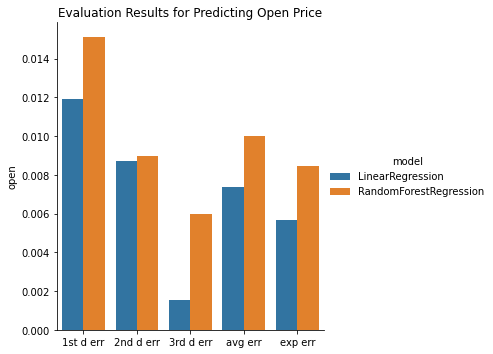

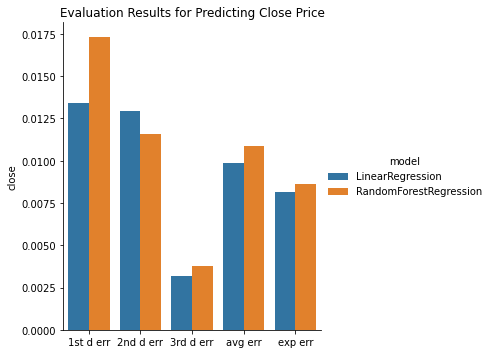

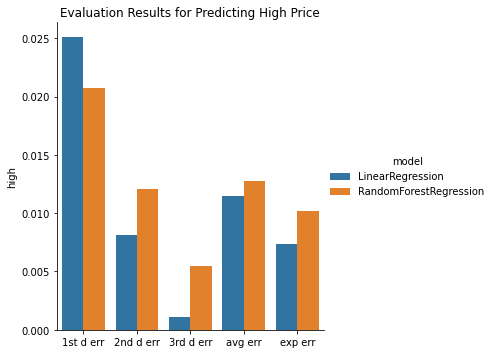

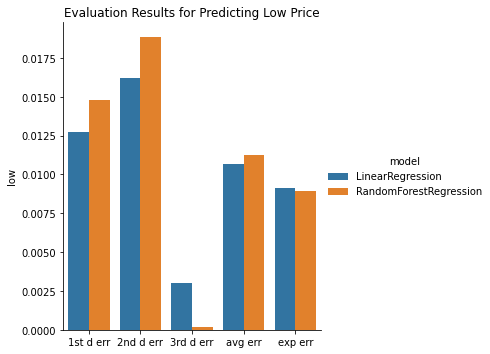

In [45]:
for price in ['open','close','high','low']:
    sns.catplot(data=df,x='index',y=price,hue='model',kind='bar')
    plt.xlabel('')
    plt.title('Evaluation Results for Predicting '+price.capitalize()+' Price')
    plt.show()